In [312]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data ##

#folder
data_folder = './data/'

#columns (from README.txt file)

chara_cols = ['wikimovID', 'freebasemovID', 'date_birth', 'namechara', "birthdate", "gender", "height", "ethnicityID", "nameactor", "age", "mapID", "charaID", "actorID"]
movie_cols = ['wikimovID', 'freebasemovID', 'namemov', 'release_date', 'boxoffice', 'runtime', 'language', 'country', 'genre']
name_clust_cols = ['name', 'mapID']
plot_summ_cols = ['wikimovID', 'summary']
tvtropes_clust_cols = ['charatrope', 'clusterID']

#load data
chara_meta_original = pd.read_csv(data_folder+'character.metadata.tsv', sep='\t', names=chara_cols)
movie_meta_original = pd.read_csv(data_folder+'movie.metadata.tsv', sep='\t', names=movie_cols)
name_clust_original = pd.read_csv(data_folder+'name.clusters.txt', sep='\t', names=name_clust_cols)
plot_summ_original = pd.read_csv(data_folder+'plot_summaries.txt', sep='\t', names=plot_summ_cols)
tvtropes_clust_original = pd.read_csv(data_folder+'tvtropes.clusters.txt', sep='\t', names=tvtropes_clust_cols)

In [313]:
#chara_meta_original.head()
movie_meta_original.head()
#name_clust_original.head()
#plot_summ_original.head()
#tvtropes_clust_original.head()

,wikimovID,freebasemovID,namemov,release_date,boxoffice,runtime,language,country,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


# First Look at the Data

In [314]:
print('Chara Meta df shape: ', chara_meta_original.shape)
print('Movie Meta df shape: ', movie_meta_original.shape)
print('Name Clust df shape: ', name_clust_original.shape)
print('Plot Summ df shape: ', plot_summ_original.shape)
print('TV Tropes Clust df shape: ', tvtropes_clust_original.shape)


Chara Meta df shape:  (450669, 13)
Movie Meta df shape:  (81741, 9)
Name Clust df shape:  (2666, 2)
Plot Summ df shape:  (42303, 2)
TV Tropes Clust df shape:  (501, 2)


In [315]:
chara_meta_original.nunique(axis=0)
#movie_meta_original.nunique(axis=0)
#name_clust_original.nunique(axis=0)
#plot_summ_original.nunique(axis=0)
#tvtropes_clust_original.nunique(axis=0)


wikimovID         64330
freebasemovID     64330
date_birth        18476
namechara        126629
birthdate         29494
gender                2
height              221
ethnicityID         479
nameactor        134078
age                 155
mapID            450669
charaID          183435
actorID          135760
dtype: int64

In [316]:
chara_meta_original.describe()
#movie_meta_original.describe()
#name_clust_original.describe()
#plot_summ_original.describe()
#tvtropes_clust_original.describe()

,wikimovID,height,age
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


In [317]:
#Check number of null values
#chara_meta_original.isna().sum()
#movie_meta_original.isna().sum()
#name_clust_original.isna().sum()
#plot_summ_original.isna().sum()
#tvtropes_clust_original.isna().sum()


# Data Cleaning

## Improving Column values 

In [318]:
#Put the date into a datetime format
movie_meta_original['release_date'] = pd.to_datetime(movie_meta_original['release_date'], errors='coerce')

#Change the dictionaries to a list??? Don't know if this is necessary or if better to keep like this and extract values whenever we need them

## Selection 

Depending on further analysis, we won't keep all movies. But first let's remove data which we will certainly never use(e.g. movies before 1970) 

In [319]:
#Remove the movies with release date before 1970
movie_meta_original = movie_meta_original[movie_meta_original['release_date'].dt.year >= 1970]

## Removing Data with Missing Values

In [320]:
#Functions to clean data 

#If we deem a column is useless, use:
def clean_useless_cols(df, cols):
    df = df.drop(cols, axis=1)
    return df

#If we deem a column has too many missing values, use:
def clean_cols_missing_values(df, threshold):
    old_len = len(df.columns)
    #threshold is the % of missing values we are willing to accept
    #if a column has more than threshold % of missing values, we drop it
    columns_to_drop = []

    for i in df.columns:
        if ((df[i].isna().sum())/(len(df[i]))) > threshold:
            columns_to_drop.append(i)
    df = df.drop(columns=columns_to_drop)
    print('Columns dropped: ', columns_to_drop)
    return df

#If we deem a row has missing values on important columns, use:
def clean_rows_important_missing(df, important_cols):
    #important_cols is a list of columns that we deem important for the analysis
    #if a row has missing values on important columns, we drop it
    df.dropna(subset=important_cols, how='any', inplace=True)
    print('New df shape: ', df.shape)
    return df
   

In [321]:
#Apply cleaning functions to dataframes
chara_meta_original = clean_cols_missing_values(chara_meta_original,0.9)
movie_meta_original = clean_cols_missing_values(movie_meta_original,0.9)
name_clust_original = clean_cols_missing_values(name_clust_original,0.7)
plot_summ_original = clean_cols_missing_values(plot_summ_original,0.7)
tvtropes_clust_original = clean_cols_missing_values(tvtropes_clust_original,0.7)

Columns dropped:  []
Columns dropped:  []
Columns dropped:  []
Columns dropped:  []
Columns dropped:  []


# Focus on plot summary

Here we will explore more in details this dataset and see if we can find some interesting insights. We will then use the wikimovID to map each movie with its metadata from the other datasets and draw more relevant conclusions.

In [337]:
#Add a column with number of words per summaries
plot_summ_original['num_words'] = plot_summ_original['summary'].apply(lambda x: len(str(x).split(" ")))
plot_summ_original.num_words.describe()


count    42303.000000
mean       312.308512
std        319.337614
min          4.000000
25%         88.000000
50%        188.000000
75%        456.000000
max       4942.000000
Name: num_words, dtype: float64

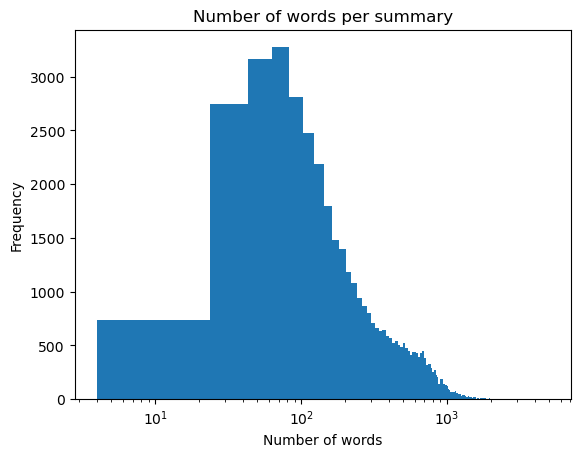

In [323]:
#Visualize number of words per summary  
plt.hist(plot_summ_original['num_words'], bins=250)
plt.xscale('log')
plt.title('Number of words per summary')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [324]:
#Merge dataframes plot_summ_original and movie_meta_original based on wikimovID 
#This will drop all movies w/o a summary
movie_meta_merged = plot_summ_original.merge(movie_meta_original, on='wikimovID', how='left')
movie_meta_merged.head()
movie_meta_merged.shape
#Use the defined function to drop rows with missing values on important columns
movie_meta_merged = clean_rows_important_missing(movie_meta_merged, ['num_words', 'boxoffice', 'runtime'])


New df shape:  (5516, 11)


In [325]:
#We could also merge movie_meta_merged and chara_meta_original based on wikimovID
#This will drop all movies w/o a summary and all characters w/o a movie
#merged = movie_meta_merged.merge(chara_meta_original, on='wikimovID', how='left')

From now on we will only use this new merged dataset to perform our analysis

<Axes: >

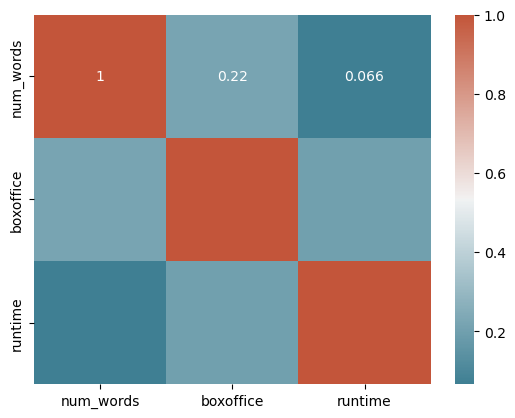

In [326]:
#Check correlation between the different rows of the merged dataframe 
#Don't need to select ikimovID column
corr = movie_meta_merged.select_dtypes(include = ['float64', 'int64']).iloc[1:, 1:].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [327]:
#top 1000 movies by box office
top_1000 = movie_meta_merged.sort_values(by='boxoffice', ascending=False)
top_1000.describe()

,wikimovID,num_words,release_date,boxoffice,runtime
count,5.516000e+03,5516.000000,5516,5.516000e+03,5516.000000
mean,8.210230e+06,558.313452,1999-02-05 17:09:52.603335680,6.649195e+07,106.795087
min,3.217000e+03,17.000000,1970-02-09 00:00:00,1.051400e+04,13.000000
25%,9.963282e+05,268.000000,1992-03-25 06:00:00,5.666716e+06,94.000000
50%,3.176982e+06,571.500000,2001-04-26 00:00:00,2.036792e+07,104.000000
75%,1.306228e+07,765.000000,2007-06-27 06:00:00,6.829638e+07,115.250000
max,3.695679e+07,3547.000000,2012-10-18 00:00:00,2.782275e+09,1003.000000
std,9.847461e+06,349.334163,NaN,1.322298e+08,22.646285


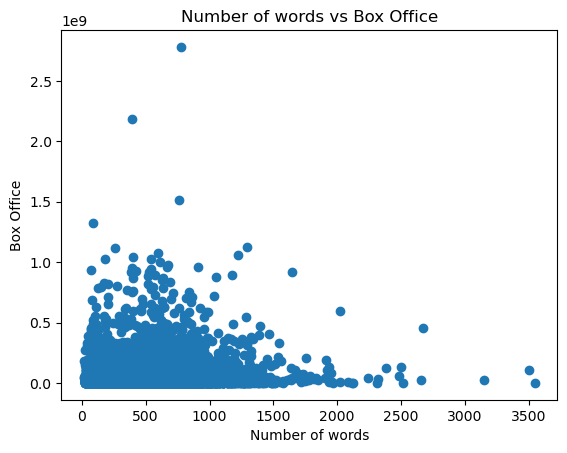

In [328]:
#Relation between number of words and box office
plt.scatter(movie_meta_merged['num_words'], top_1000['boxoffice'])
plt.title('Number of words vs Box Office')
plt.xlabel('Number of words')
plt.ylabel('Box Office')
plt.show()

# How to predict "dumbing" down in movies?

In [329]:
from textblob import TextBlob

#Add a column with sentiment polarity per summary (from -1 to 1 where -1 is negative sentiment and 1 is positive)
movie_meta_merged['sentiment'] = movie_meta_merged['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

<Axes: >

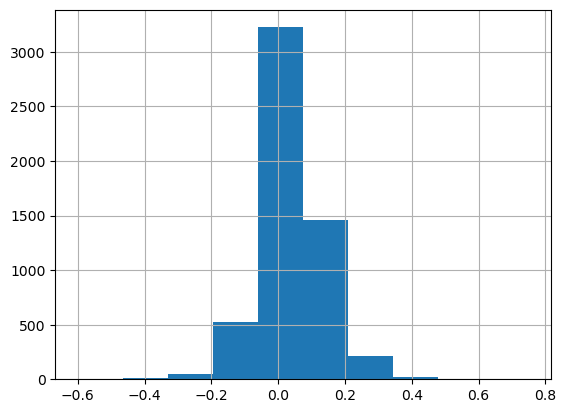

In [330]:
movie_meta_merged['sentiment'].hist()

<Axes: >

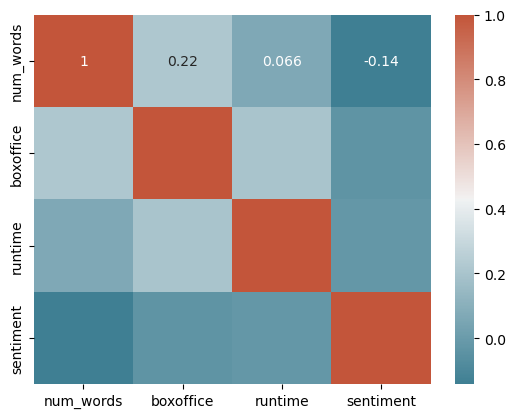

In [331]:
#With which parameters does the sentiment correlate?
corr = movie_meta_merged.select_dtypes(include = ['float64', 'int64']).iloc[1:, 1:].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [332]:
from textstat import flesch_kincaid_grade

movie_meta_merged['readability'] = movie_meta_merged['summary'].apply(flesch_kincaid_grade)

<Axes: >

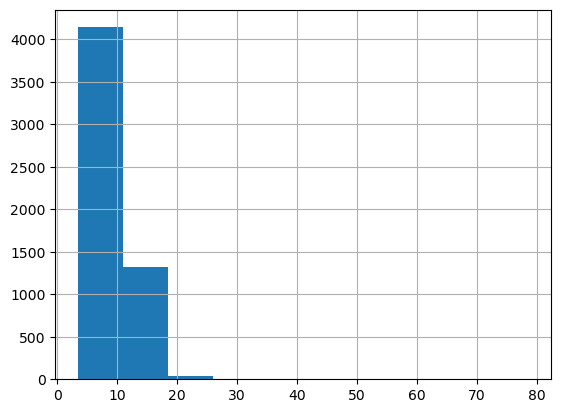

In [333]:
movie_meta_merged['readability'].hist()

Text(0.5, 1.0, 'Sentiment vs Readability')

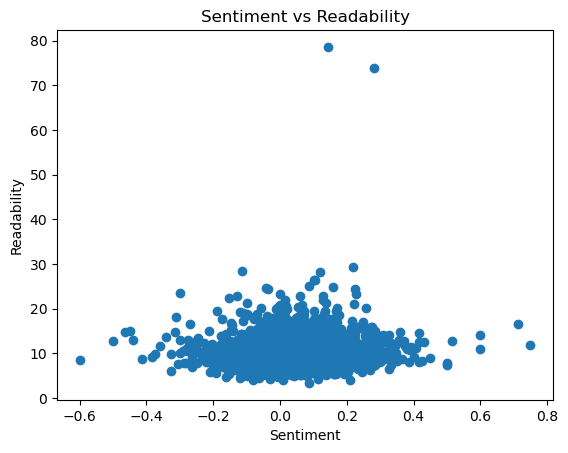

In [334]:
plt.scatter(movie_meta_merged['sentiment'], movie_meta_merged['readability'])
plt.xlabel('Sentiment')
plt.ylabel('Readability')
plt.title('Sentiment vs Readability')

Text(0.5, 1.0, 'Readability vs Release Date')

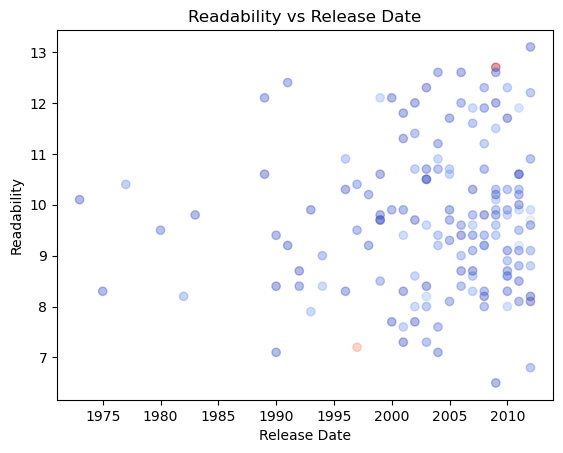

In [335]:
#Relation between readability, release date (year) and boxoffice for the top 150 boxoffice. 
#Does readability increase over time?
top_150 = movie_meta_merged.sort_values(by='boxoffice', ascending=False).head(150)
plt.scatter(top_150['release_date'].dt.year, top_150['readability'], alpha=0.4, c=top_150['boxoffice'], cmap='coolwarm')
plt.xlabel('Release Date')
plt.ylabel('Readability')
plt.title('Readability vs Release Date')


# Extra stuffs

In [ ]:
#####################
#Extract dictionary values from the column

# Define a function to extract values from dictionaries
def extract_values(d):
    # Use the eval() function to parse the dictionary and return values
    try:
        d_dict = eval(d)
        return list(d_dict.values())
    except (NameError, SyntaxError):
        return None

#Metadata Movies
columns_with_dicts = ['language', 'country', 'genre']  
for col in columns_with_dicts:
    movie_meta_original[col] = movie_meta_original[col].apply(extract_values)

movie_meta_original.head()